In [1]:
import pickle
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import pandas as pd

Read saved serialized predictions (see 1vA.ipynb)

In [2]:
with open("results_1vA_new.pickle", 'rb') as f:
    results = pickle.load(f)
    
datasets = list(results.keys())
datasets

['ajt', 'chd', 'corpas', 'yri']

Compute overall accuracy for all datasets and methods

In [3]:
def accuracy(test, pred_type):
    return accuracy_score(results[test]['y_test'],
                          results[test][pred_type])

data = [[accuracy(test, pred_type) for pred_type in ["preds_naive", "preds_ci", "preds_lr", "preds_xgb"]] for test in datasets]

df = pd.DataFrame(data, columns=["No recal", "Confidence intervals", "Logistic regression", "XGBoost"])
df['Trio'] = ['chd', 'ajt', 'corpas', 'yri']
df[['Trio', 'No recal', "Confidence intervals", 'Logistic regression', 'XGBoost']]

,Trio,No recal,Confidence intervals,Logistic regression,XGBoost
0,chd,0.876236,0.968693,0.976986,0.988311
1,ajt,0.893423,0.925840,0.926708,0.943900
2,corpas,0.903020,0.947417,0.950986,0.964564
3,yri,0.875756,0.963037,0.974023,0.982650


Plot overall results

In [4]:
contaminations = sorted(list(results['ajt']['idx'].keys()))
pred_types = ['preds_naive',  'preds_ci', 'preds_lr', 'preds_xgb']
pred_names = {'preds_naive': "No recalibration",
              'preds_ci': "Confidence interval",
              'preds_lr': "Logistic regression",
              'preds_xgb': "XGBoost"}

scores = {}

for test in datasets:
    scores[test] = {}
    
    for pred_type in pred_types:
        scores[test][pred_type] = []
        for contamination in contaminations:
            scores[test][pred_type].append(accuracy_score(results[test]['y_test'][results[test]['idx'][contamination]],
                                                          results[test][pred_type][results[test]['idx'][contamination]]))

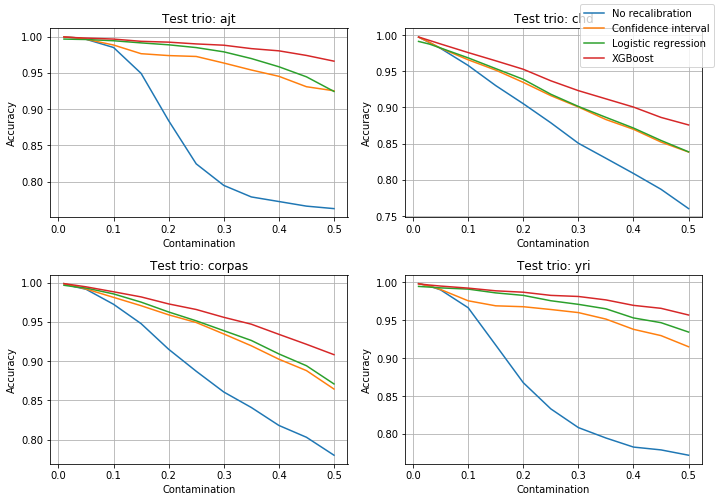

In [5]:
sp, ax = plt.subplots(2, 2, figsize=(10, 7))

for i in range(2):
    for j in range(2):
        test = datasets[2*i + j]
        ax[i,j].set_title("Test trio: {}".format(test))

        for pred_type in pred_types:
            ax[i,j].plot(contaminations, scores[test][pred_type], label=pred_names[pred_type])
        
        
        ax[i,j].grid()
        ax[i, j].set_xlabel("Contamination")
        ax[i, j].set_ylabel("Accuracy")

plt.tight_layout()
handles, labels = ax[1, 1].get_legend_handles_labels()
sp.legend(handles, labels, loc='upper right')
# sp.savefig('accuracies.eps', format='eps', dpi=1000)